# Iris Flowers Classification ML Project

The main objective of the project is to perform a basic supervised machine learning on the iris dataset using logistic regression as the classifier. For visualization, various plots such as the scatter plot, correlation heatmap and pair-plots have been used. Finally, predictions are made using the logistic regression function and accuracy score and a classification report is displayed.

In [4]:
pip install -U notebook-as-pdf

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install pyppeteer

Note: you may need to restart the kernel to use updated packages.


In [1]:
!pip install nbconvert[webpdf]

In [1]:
!pip install seaborn

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
log_model = LogisticRegression(solver='lbfgs', max_iter=1000)

In [20]:
# Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

In [21]:
# Create a DataFrame from the iris data
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

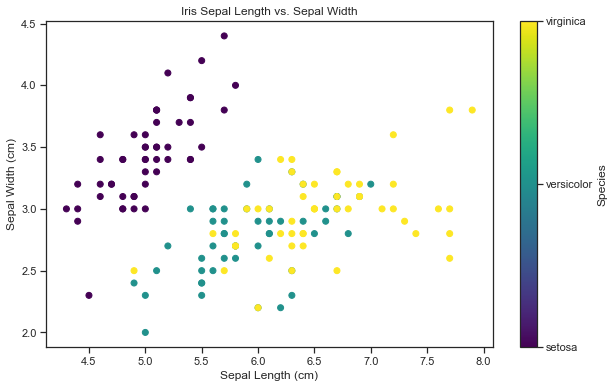

In [22]:
# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'],
            c=iris_df['target'], cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Sepal Length vs. Sepal Width')
plt.colorbar(ticks=[0, 1, 2], label='Species',
             format=plt.FuncFormatter(lambda val, _: iris.target_names[int(val)]))
plt.show()

In [23]:
# Calculate the correlation matrix
corr_matrix = iris_df.corr()

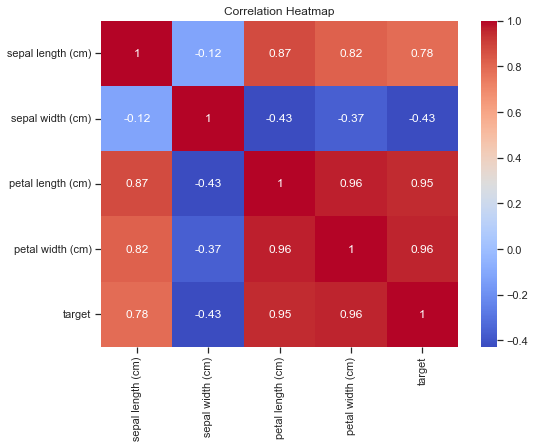

In [24]:
# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

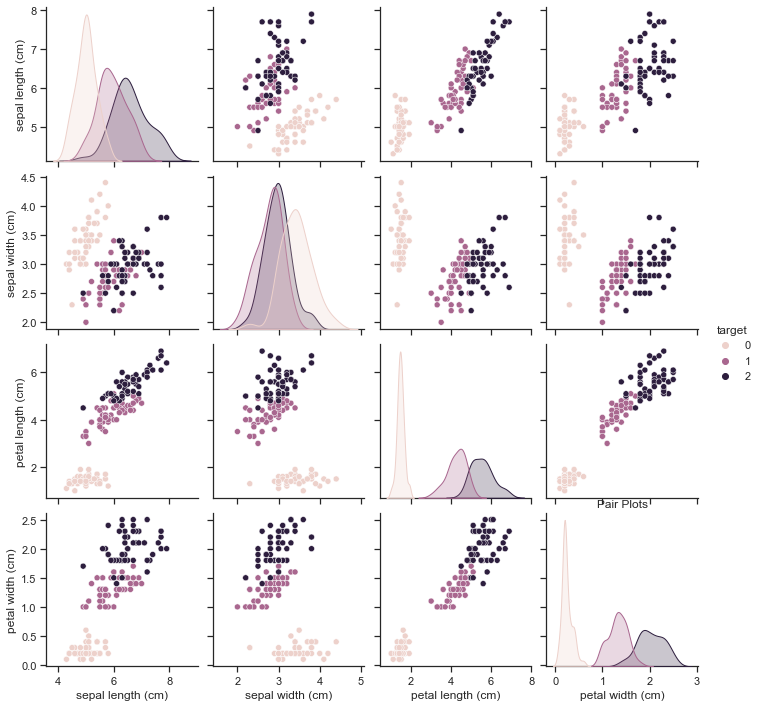

In [25]:
# Plot pair plots
sns.set(style="ticks")
sns.pairplot(iris_df, hue="target")
plt.title('Pair Plots')
plt.show()

In [26]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    iris_df[iris.feature_names], iris_df['target'], test_size=0.2, random_state=42)

In [27]:
# Create a logistic regression model
model = LogisticRegression()

In [32]:
log_reg = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)

In [33]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [45]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0])

In [42]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [57]:
classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        10

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

